In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import torch
import os
from torchvision import models
from util import load_data, model_train, model_test, metrics_plot
device = torch.device("cuda")
from hyperparameters import(
        PATH,
        save_path,
        learning_rate,
        batch_size,
        num_epochs,
        image_resize,
        num_each_class,
        val_ratio,
        test_ratio)

In [5]:
# Create DataLoaders if needed
train_loader, val_loader, test_loader = load_data(path=PATH, num=num_each_class, val_ratio=val_ratio, test_ratio=test_ratio, batch_size=batch_size, image_resize=image_resize)

Train size: 7500, Val size: 3000, Test size: 4500
Time for loading data: 98.76s


In [6]:
# ResNet50
model = models.resnet50(weights='DEFAULT')
name = 'resnet50.pth'
name = os.path.join(save_path, name)

# Modify final fully connected layer
num_features = model.fc.in_features
model.fc = torch.nn.Linear(num_features, 10)

# load model
# model.load_state_dict(torch.load(name))

# Define loss function
criterion = torch.nn.CrossEntropyLoss()
criterion = criterion.to(device)

# Define optimizer
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

accs, losses = model_train(model, optimizer, criterion, device, train_loader, val_loader, num_epochs)
pred, true = model_test(model, criterion, device, test_loader)

# Save the state dictionary of the model
torch.save(model.state_dict(), name)

Total parameters: 23528522
Trainable parameters: 23528522


100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


Epoch 1/3
Train Loss: 0.4371, Train Acc: 88.6727
Val Loss: 0.0657, Val Acc: 98.14


100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


Epoch 2/3
Train Loss: 0.0457, Train Acc: 98.8140
Val Loss: 0.0463, Val Acc: 98.74


100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


Epoch 3/3
Train Loss: 0.0263, Train Acc: 99.2271
Val Loss: 0.0290, Val Acc: 99.20
Training time: 323.94s


100%|██████████| 282/282 [00:32<00:00,  8.78it/s]

Test Loss: 0.0325, Test Acc: 99.18


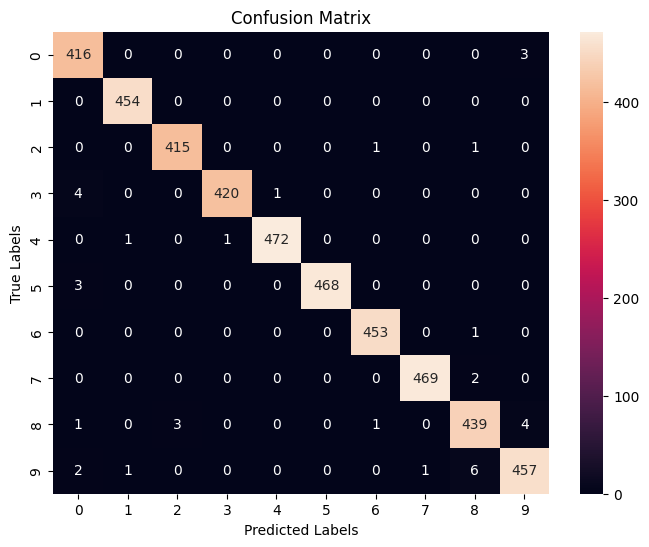

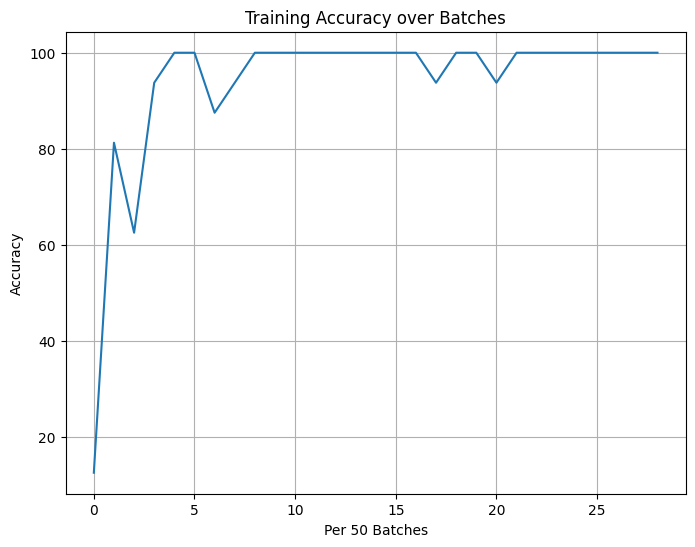

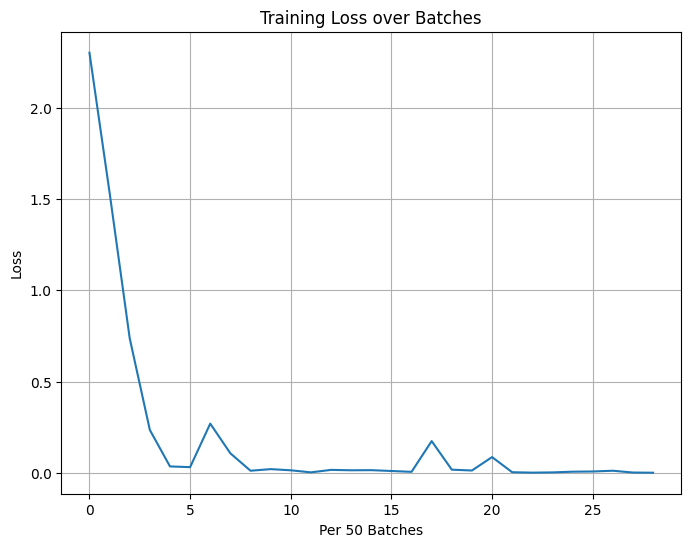

In [7]:
metrics_plot(pred, true, accs, losses, 50)

In [8]:
# VGG16
model = models.vgg16(weights='DEFAULT')
name = 'vgg16.pth'
name = os.path.join(save_path, name)

# Modify final fully connected layer
num_features = model.classifier[6].in_features
model.classifier[6] = torch.nn.Linear(num_features, 10)

# load model
# model.load_state_dict(torch.load(name))

# Define loss function
criterion = torch.nn.CrossEntropyLoss()
criterion = criterion.to(device)

# Define optimizer
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

accs, losses = model_train(model, optimizer, criterion, device, train_loader, val_loader, num_epochs)
pred, true = model_test(model, criterion, device, test_loader)

# Save the state dictionary of the model
torch.save(model.state_dict(), name)

Total parameters: 134301514
Trainable parameters: 134301514


100%|██████████| 188/188 [00:27<00:00,  6.88it/s]


Epoch 1/3
Train Loss: 0.6251, Train Acc: 78.7180
Val Loss: 0.0980, Val Acc: 97.57


100%|██████████| 188/188 [00:27<00:00,  6.84it/s]


Epoch 2/3
Train Loss: 0.0912, Train Acc: 97.5346
Val Loss: 0.0873, Val Acc: 98.01


100%|██████████| 188/188 [00:27<00:00,  6.78it/s]


Epoch 3/3
Train Loss: 0.0721, Train Acc: 97.9522
Val Loss: 0.0959, Val Acc: 97.34
Training time: 550.81s


100%|██████████| 282/282 [00:40<00:00,  6.91it/s]


Test Loss: 0.0800, Test Acc: 97.74


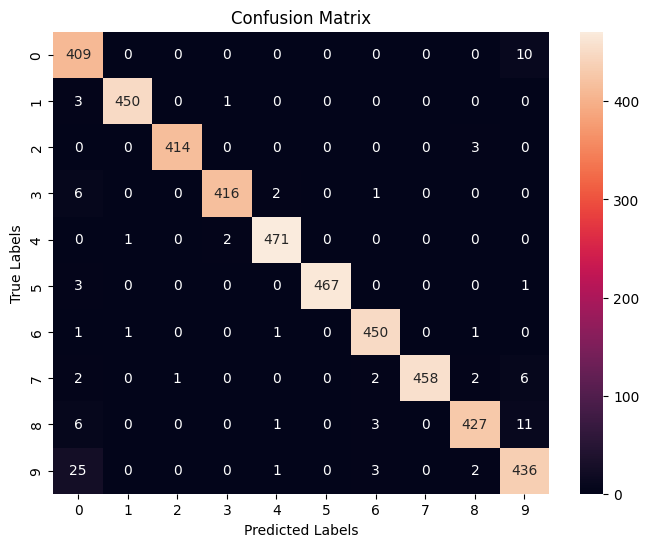

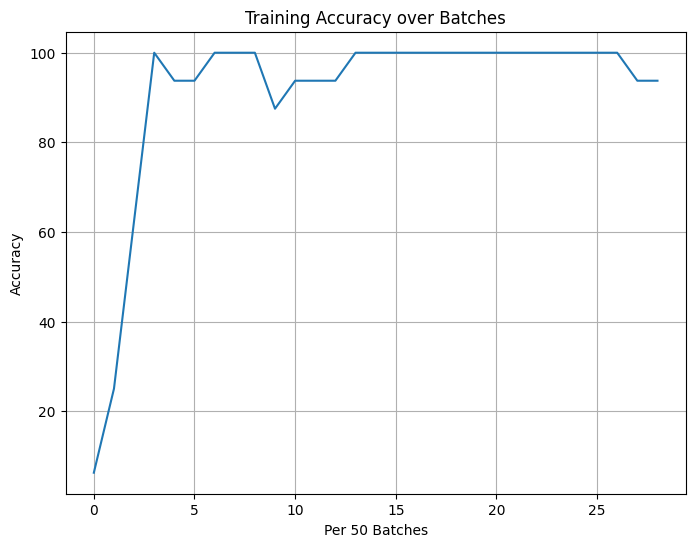

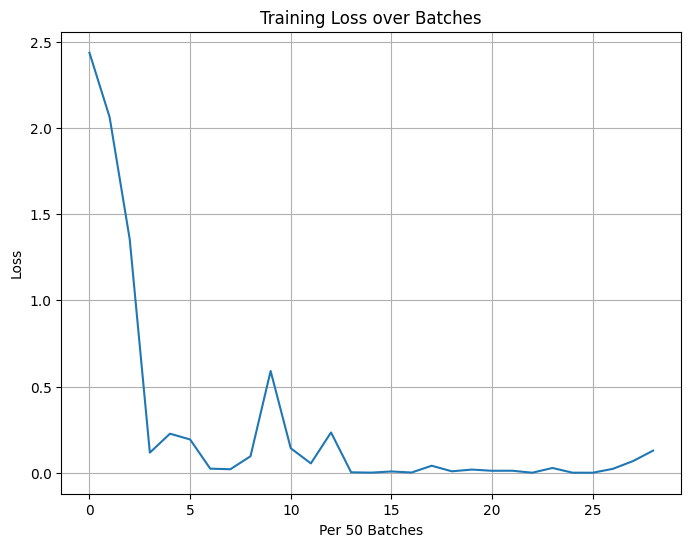

In [9]:
metrics_plot(pred, true, accs, losses, 50)